# Linear Regression: One Idea, Three Perspectives

Linear regression looks simple on the surface — draw a line through data — but underneath that simplicity is a surprisingly elegant structure. What most people don’t realize is that linear regression is actually one idea expressed in three different mathematical languages:

1. Optimization form — learn the line by minimizing a loss function
2. Geometric form — compute the line as a projection
3. Algebraic form — compute the line using means, sums, covariance, and variance

Each form tells the same story from a different angle. When you see all three together, the whole picture snaps into place.

This post walks through each form using the same dataset and the same goal:

 find the best‑fit line that predicts y from x.

![image](mathematics/3_forms.jpg)

# 1. Optimization Form: Learning the Line by Minimizing Loss
**The optimization view is the one used in machine learning.**

 - Start with random parameters
 - Measure how wrong the model is 
 - Adjust the parameters to reduce that error.

 [Kaggle Notebook with Data]('https://www.kaggle.com/code/onneder/notebook22097c08ee')

The Data

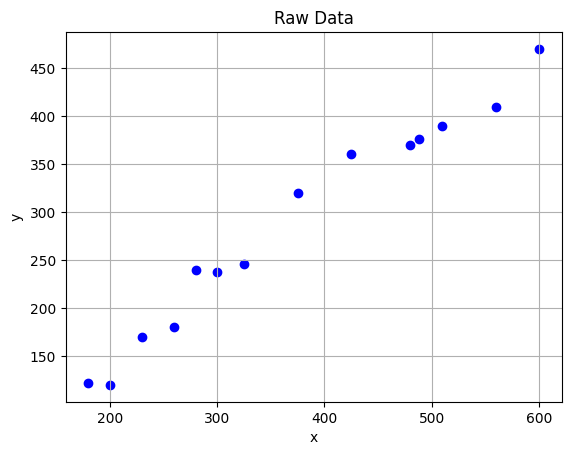

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Raw data
x = np.array([180, 200, 230, 260, 280, 300, 325, 375, 425, 480, 488, 510, 560, 600])
y = np.array([122, 120, 170, 180, 240, 238, 246, 320, 361, 370, 376, 390, 410, 470])

plt.scatter(x, y, color='blue')
plt.title("Raw Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


## Centering & Normalizing x

- Gradient descent behaves dramatically better when features are normalized.
- Centering shifts the cloud so its mean is at 0
- Normalization scales the spread to 1

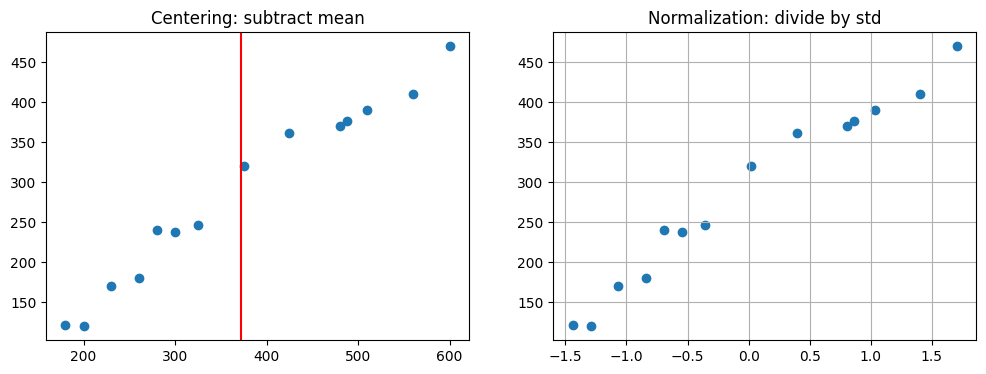

In [2]:
x_mean = x.mean()
x_std = x.std()

x_center = x - x_mean
x_norm = x_center / x_std

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(x, y)
plt.axvline(x_mean, color='red')
plt.title("Centering: subtract mean")

plt.subplot(1,2,2)
plt.scatter(x_norm, y)
plt.title("Normalization: divide by std")
plt.grid(True)

plt.show()


# Gradient Descent
**The idea:**

1. Start with random slope m and intercept c
2. Compute predictions
3. Compute the loss (MSE)
4. Compute gradients — how much the loss changes if you nudge m or c
5. Update parameters:

![image](mathematics/optimizatiion.jpg)


In [3]:
m = np.random.randn()
c = np.random.randn()
lr = 0.01

loss_history = []

for epoch in range(250):
    y_pred = m * x_norm + c
    error = y_pred - y

    dm = (2 * (error * x_norm)).mean()
    #dm = (2/n) * np.sum(error * x)
    dc = (2 * error).mean()
    #db = (2/n) * np.sum(error)

    m -= lr * dm
    c -= lr * dc

    loss_history.append((error**2).mean())


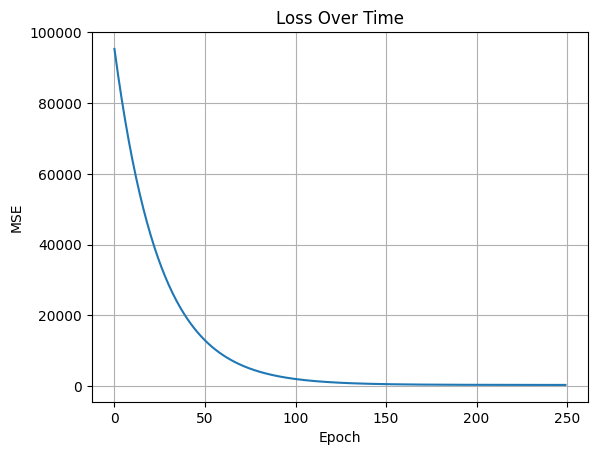

In [11]:
#Loss curve
plt.plot(loss_history)
plt.title("Loss Over Time")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

## Convert Back to Real Units
**Because we trained on normalized x:**

![image](mathematics/real_slop.jpg)

In [5]:
m_real = m / x_std
c_real = c - m_real * x_mean

print("Learned slope m:", m_real)
print("Learned intercept c:", c_real)


Learned slope m: 0.8016256499846478
Learned intercept c: -13.697305204380939


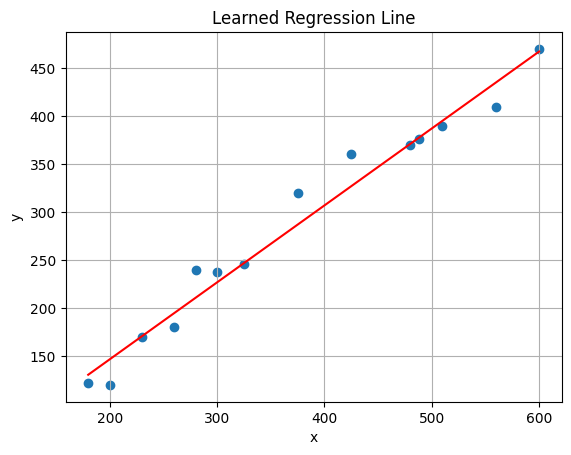

In [6]:
# 6. Plot Learned Regression Line
plt.scatter(x, y)

plt.plot(x, m_real * x + c_real, color='red')
plt.title("Learned Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()



## 2. Geometric Form: The Projection Formula (OLS)

This is the most elegant view.
Once you center the data, linear regression becomes:
Projecting the vector y onto the vector x.

**The projection formula gives the exact solution in one step:**

![projection](mathematics/matrix_form_ols.jpg)

This is the exact solution gradient descent is trying to reach.

In [7]:
X = np.column_stack([np.ones_like(x), x])  # (n, 2)
y_reshape = y.reshape(-1, 1)                       # (n, 1)

beta = np.linalg.inv(X.T @ X) @ (X.T @ y_reshape)  # (2, 1)
b, m = beta.flatten()

print("Learned slope m:", m)
print("Learned intercept c:", b)

y_hat = X @ beta                           # projection of y
residual = y_reshape - y_hat


Learned slope m: 0.806805735687497
Learned intercept c: -13.777021438494472


In [8]:
#  Compare Gradient Descent vs Projection
print("GD slope:", m_real)
print("Projection slope:", m)


GD slope: 0.8016256499846478
Projection slope: 0.806805735687497


## 3. Algebraic Form: Means, Sums, Covariance, Variance
**This is the form taught in statistics classes** 
- no matrices
- no optimization
-  just arithmetic

![projection](mathematics/algebraic_form.jpg)

In [10]:
# Step 1: Means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Step 2: Covariance(x, y) and Variance(x)
cov_xy = np.sum((x - x_mean) * (y - y_mean))
var_x  = np.sum((x - x_mean)**2)

# Step 3: Slope m
m = cov_xy / var_x

# Step 4: Intercept b
b = y_mean - m * x_mean

# Step 5: Predictions
y_hat = m * x + b

# Display results
print("Algebraic Linear Regression")
print("---------------------------")
print(f"Mean of x: {x_mean:.3f}")
print(f"Mean of y: {y_mean:.3f}")
print(f"Cov(x, y): {cov_xy:.3f}")
print(f"Var(x):    {var_x:.3f}")
print()
print(f"Slope (m):     {m:.6f}")
print(f"Intercept (b): {b:.6f}")


Algebraic Linear Regression
---------------------------
Mean of x: 372.357
Mean of y: 286.643
Cov(x, y): 201153.786
Var(x):    249321.214

Slope (m):     0.806806
Intercept (b): -13.777021


### Summary

**How the Three Forms Connect**

Even though the math looks different, all three approaches converge to the same line

- Centering moves the cloud to the origin.
- Normalization scales x to unit variance.
- Gradient descent learns m and c by minimizing MSE.
- Projection formula gives the exact slope in one step.
- Correlation is cosine similarity between centered x and y.
- R² is the squared cosine.
- MSE is the squared length of the residual vector.
- Gradient descent and projection converge to the same line.
